##EXPLORATION DRAFT##

This is the Branch we will parse the data in. You can load the data below.

Business Understanding 


we are a medium size company. we want to purchase an safest airplane on a budget.
we have a budget of $12 million. according to research, singele engine and reciprocating engine type is the safest yet the cheapest. 
however, we wsnt the lowest ricke of airlane. we recommend to uprgrade to turbo 1 engine or 2 engine number within a budget. 
these are the makes we found safest within 1engine or 2 engine number.

Data Understanding

In [184]:
#importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
#pulling csv file
state = pd.read_csv('./airplane_data/USState_Codes.csv')

aviation_2008 = pd.read_csv('./airplane_data/AviationData.csv', encoding='latin-1')

/Users/goknurkaya/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [186]:
# Filter data for years 2008 and later
aviation["Year"] = aviation["Event.Date"].map(lambda x: int(x[:4]))
aviation["Year"] = aviation["Year"].astype(int)
aviation_2008 = aviation[aviation["Year"] >= 2008]

# Filter for 'Aircraft.Category' == 'Airplane'
aviation_2008 = aviation_2008[aviation_2008["Aircraft.Category"] == "Airplane"]

# Drop rows with missing values in 'Number.of.Engines' and 'Engine.Type'
aviation_2008 = aviation_2008.dropna(subset=["Number.of.Engines", "Engine.Type"])

# Filter for 'Amateur.Built' == 'No' 
aviation_2008 = aviation_2008[aviation_2008['Amateur.Built'] == 'No']


<ipython-input-187-cb62edd4ad00>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


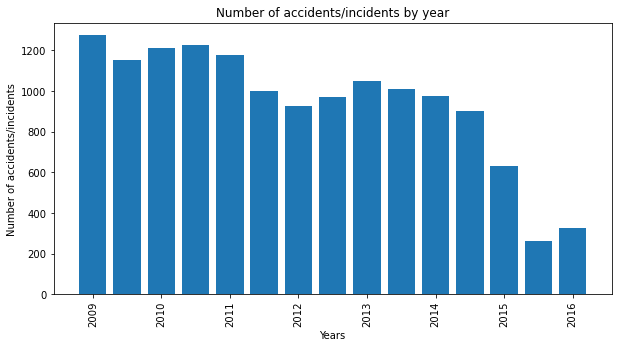

In [187]:
# Investigating frequency of accidents/incidents by year
years = aviation_2008["Year"].value_counts().sort_index().index
fre_years = aviation_2008["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(years, fre_years)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");


<ipython-input-188-20e09556fa4e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation=90)


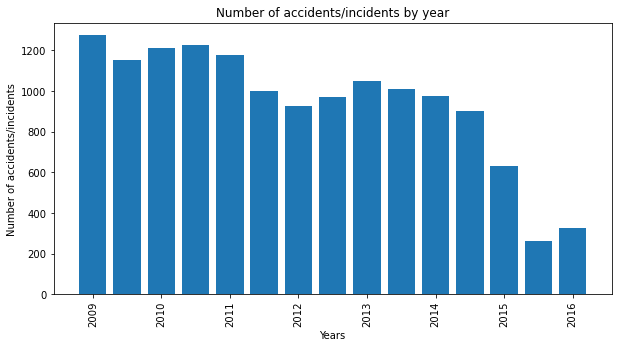

In [188]:
# Investigating frequency of accidents/incidents by year
years = aviation_2008["Year"].value_counts().sort_index().index
fre_years = aviation_2008["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(years, fre_years)
ax.set_xticklabels(years, rotation=90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");

<ipython-input-189-a2067ecdb4b1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a_year, rotation=90)


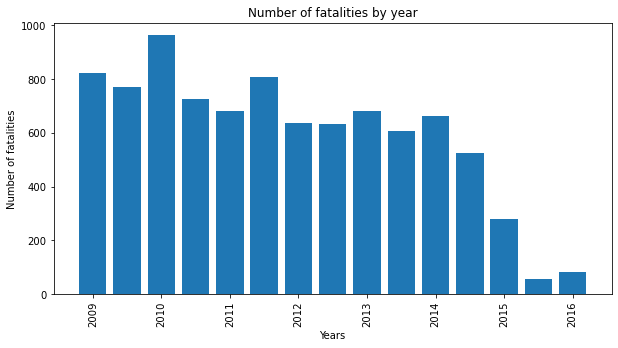

In [189]:
# Investigating fatality by year 
aviation_2008['Total_Injuries'] = aviation_2008['Total.Fatal.Injuries'] + aviation_2008['Total.Serious.Injuries']
a_year = aviation_2008.groupby("Year")["Total_Injuries"].sum().index

fatality = aviation_2008.groupby("Year")["Total_Injuries"].sum().values

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(a_year, fatality)
ax.set_xticklabels(a_year, rotation=90)
ax.set_ylabel("Number of fatalities")
ax.set_xlabel("Years")
ax.set_title("Number of fatalities by year");


In [190]:
# Percentage of Accidents/Incidents by Number of Engines
aviation_2008["Number.of.Engines"].value_counts(normalize = True)

1.0    0.843972
2.0    0.151348
4.0    0.003475
3.0    0.001064
8.0    0.000071
0.0    0.000071
Name: Number.of.Engines, dtype: float64

In [191]:
# Percentage of Accidents/Incidents by Engine Type
aviation_2008["Engine.Type"].value_counts(normalize = True)

Reciprocating      0.864043
Turbo Prop         0.072908
Turbo Fan          0.052482
Turbo Jet          0.007730
Unknown            0.001206
Geared Turbofan    0.000780
Turbo Shaft        0.000426
Electric           0.000355
UNK                0.000071
Name: Engine.Type, dtype: float64

In [192]:
df_engine = aviation_2008[aviation_2008["Number.of.Engines"] > 1]
df_engine["Number.of.Engines"].value_counts(normalize = True)

2.0    0.970441
4.0    0.022283
3.0    0.006821
8.0    0.000455
Name: Number.of.Engines, dtype: float64

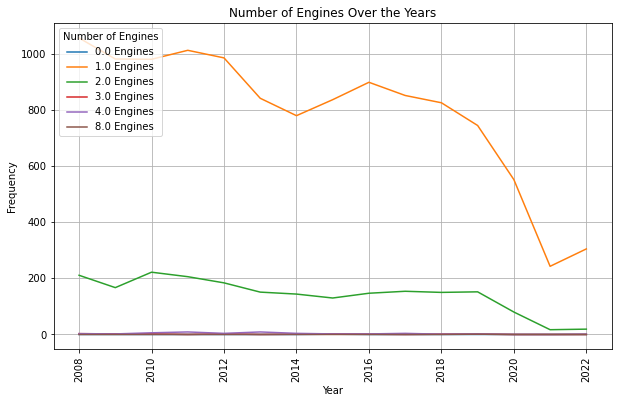

In [193]:
# Want to see engine number based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df = aviation_2008.pivot_table(index='Year', columns='Number.of.Engines', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=f'{column} Engines')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Engines Over the Years')
plt.legend(title='Number of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

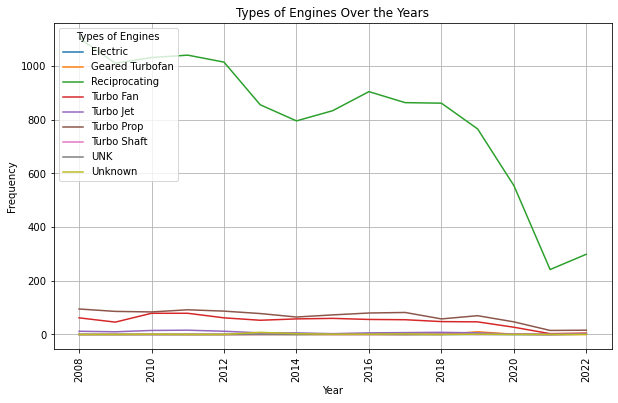

In [194]:
# Want to see engine type based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df1 = aviation_2008.pivot_table(index='Year', columns='Engine.Type', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[column], label=f'{column}')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Types of Engines Over the Years')
plt.legend(title='Types of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [195]:
aviation_2008['Purpose.of.flight'].value_counts()

Personal                     8647
Instructional                2000
Aerial Application            656
Business                      341
Positioning                   240
Aerial Observation            128
Other Work Use                110
Flight Test                   103
Skydiving                      99
Unknown                        87
Ferry                          80
Executive/corporate            73
Banner Tow                     69
Public Aircraft - Federal      43
Air Race show                  38
Glider Tow                     28
Public Aircraft - State        21
Public Aircraft                20
Public Aircraft - Local        12
Firefighting                   11
Air Drop                        3
PUBS                            2
ASHO                            1
Name: Purpose.of.flight, dtype: int64

In [196]:
aviation_2008['Number.of.Engines'].value_counts()

1.0    11900
2.0     2134
4.0       49
3.0       15
8.0        1
0.0        1
Name: Number.of.Engines, dtype: int64

In [197]:
missing_values = aviation_2008.isna().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                    318
Longitude                   318
Airport.Code               3819
Airport.Name               3650
Injury.Severity             140
Aircraft.damage             443
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         2
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description              94
Schedule                  12867
Purpose.of.flight          1288
Air.carrier                6067
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition           552
Broad.phase.of.flight     14100
Report.Status               974
Publication.Date             18
Year    

In [198]:
summary_statistics = aviation_2008[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].describe()

print(summary_statistics)

       Total.Fatal.Injuries  Total.Serious.Injuries
count          14100.000000            14100.000000
mean               0.338298                0.294326
std                1.712268                2.017136
min                0.000000                0.000000
25%                0.000000                0.000000
50%                0.000000                0.000000
75%                0.000000                0.000000
max              157.000000              137.000000


In [199]:
aviation_2008['Engine.Type'].value_counts()

Reciprocating      12183
Turbo Prop          1028
Turbo Fan            740
Turbo Jet            109
Unknown               17
Geared Turbofan       11
Turbo Shaft            6
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [200]:
aviation_2008['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.674914
Instructional                0.156104
Aerial Application           0.051202
Business                     0.026616
Positioning                  0.018732
Aerial Observation           0.009991
Other Work Use               0.008586
Flight Test                  0.008039
Skydiving                    0.007727
Unknown                      0.006791
Ferry                        0.006244
Executive/corporate          0.005698
Banner Tow                   0.005386
Public Aircraft - Federal    0.003356
Air Race show                0.002966
Glider Tow                   0.002185
Public Aircraft - State      0.001639
Public Aircraft              0.001561
Public Aircraft - Local      0.000937
Firefighting                 0.000859
Air Drop                     0.000234
PUBS                         0.000156
ASHO                         0.000078
Name: Purpose.of.flight, dtype: float64

In [201]:
aviation_2008['Number.of.Engines'].value_counts()

1.0    11900
2.0     2134
4.0       49
3.0       15
8.0        1
0.0        1
Name: Number.of.Engines, dtype: int64

In [202]:
df = aviation_2008[['Make', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries']].copy()

df[['Total.Fatal.Injuries', 'Total.Serious.Injuries']] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].fillna(0)

df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']

result = df.groupby(['Make'])[['Number.of.Engines', 'Engine.Type', 'Total_Injuries']].max()
result = result.reset_index()

#sorted_result = result.sort_values(by='Total_Injuries', ascending=False)

#print(sorted_result.head(20))

In [203]:
sorted_result = result.sort_values(by='Total_Injuries', ascending=False)

sorted_result.head(20)

,Make,Number.of.Engines,Engine.Type,Total_Injuries
32,AIRBUS,4.0,Turbo Fan,157.0
142,BOEING,4.0,Unknown,140.0
148,BOMBARDIER INC,2.0,Turbo Prop,49.0
846,SUKHOI,2.0,Turbo Fan,44.0
344,EMBRAER,2.0,Turbo Prop,28.0
143,BOEING COMPANY,2.0,Turbo Fan,19.0
119,Aviocar CASA,2.0,Turbo Prop,18.0
691,PILATUS,1.0,Turbo Prop,14.0
198,CESSNA,2.0,Unknown,12.0
455,GULFSTREAM AEROSPACE,2.0,Turbo Jet,12.0


In [204]:
sorted_result.tail(20)

,Make,Number.of.Engines,Engine.Type,Total_Injuries
581,Leigh,1.0,Reciprocating,0.0
557,L GOLDNER,1.0,Reciprocating,0.0
554,Kitty Hawk,8.0,Electric,0.0
528,JABIRU,1.0,Reciprocating,0.0
542,KELM DAVID,1.0,Reciprocating,0.0
530,JABIRU USA SPORT AIRCRAFT LLC,1.0,Reciprocating,0.0
535,JOHN Sample,1.0,Reciprocating,0.0
537,JUST AIRCRAFT LLC,1.0,Reciprocating,0.0
538,Jackson,1.0,Reciprocating,0.0
144,BOEING OF CANADA/DEHAV DIV,2.0,Turbo Prop,0.0


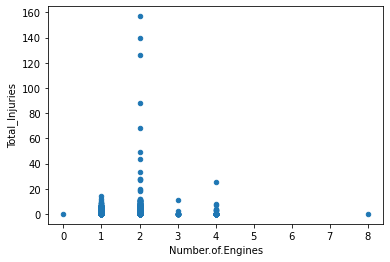

In [205]:
df.plot(x='Number.of.Engines', y='Total_Injuries', kind='scatter');

In [206]:
def process_purpose(purpose):
    df = aviation_2008[aviation_2008['Purpose.of.flight'] == purpose]

    df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']

    # Group by relevant columns and aggregate
    #total = df.groupby(['Make', 'Model', 'Engine.Type']).agg({'Total_Injuries': 'sum', 'Number.of.Engines': 'max'}).reset_index()
    total = df.groupby(['Make','Engine.Type']).agg({'Total_Injuries': 'sum', 'Number.of.Engines': 'max'}).reset_index()
    total = total.sort_values(by='Total_Injuries', ascending=False)
    
    return total

In [207]:
process_purpose('Personal').head(50)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
133,CESSNA,Reciprocating,1278.0,2.0
509,PIPER,Reciprocating,944.0,2.0
94,BEECH,Reciprocating,415.0,2.0
187,Cessna,Reciprocating,251.0,2.0
531,Piper,Reciprocating,177.0,2.0
452,MOONEY,Reciprocating,136.0,1.0
153,CIRRUS DESIGN CORP,Reciprocating,122.0,1.0
118,Beech,Reciprocating,70.0,2.0
98,BELLANCA,Reciprocating,43.0,1.0
95,BEECH,Turbo Prop,42.0,2.0


In [208]:
process_purpose('Personal').tail(50)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
299,FLEETWOOD JACK,Reciprocating,0.0,1.0
298,FLEET,Reciprocating,0.0,1.0
297,FK LIGHTPLANES,Reciprocating,0.0,1.0
295,FIELDS MIKE,Reciprocating,0.0,1.0
294,FETTERMAN LANNY R,Reciprocating,0.0,1.0
292,FERDON,Reciprocating,0.0,1.0
327,GOLDEN CIRCLE AIR,Reciprocating,0.0,1.0
291,FARTHING JAMES W II,Reciprocating,0.0,1.0
290,FANTASY AIR SRO,Reciprocating,0.0,1.0
289,FANTASY AIR,Reciprocating,0.0,1.0


In [209]:
process_purpose('Instructional').head(20)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
52,CESSNA,Reciprocating,227.0,2.0
162,PIPER,Reciprocating,150.0,2.0
42,BEECH,Reciprocating,44.0,2.0
169,Piper,Reciprocating,40.0,2.0
72,Cessna,Reciprocating,33.0,2.0
61,CIRRUS DESIGN CORP,Reciprocating,15.0,1.0
48,Beech,Reciprocating,13.0,2.0
2,AERONCA,Reciprocating,9.0,1.0
89,DIAMOND AIRCRAFT IND INC,Reciprocating,8.0,2.0
200,TAYLORCRAFT,Reciprocating,8.0,1.0


In [210]:
process_purpose('Instructional').tail(20)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
106,Evektor-Aerotechnik,Reciprocating,0.0,1.0
81,CubCrafters Inc,Reciprocating,0.0,1.0
94,Diamond,Reciprocating,0.0,2.0
83,Czech Sport AIrcraft,Reciprocating,0.0,1.0
84,DE HAVILLAND,Turbo Prop,0.0,1.0
85,DEHAVILLAND,Reciprocating,0.0,1.0
87,DIAMOND AIRCRAFT,Reciprocating,0.0,1.0
88,DIAMOND AIRCRAFT IND GMBH,Reciprocating,0.0,2.0
91,DORNIER GMBH,Turbo Fan,0.0,2.0
92,DOUGLAS,Turbo Prop,0.0,2.0


In [211]:
process_purpose('Business').head(20)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
16,CESSNA,Reciprocating,69.0,2.0
5,BEECH,Reciprocating,26.0,2.0
72,PIPER,Reciprocating,20.0,2.0
26,Cessna,Reciprocating,13.0,2.0
28,Cessna,Turbo Jet,10.0,2.0
21,CIRRUS DESIGN CORP,Reciprocating,9.0,1.0
12,Beech,Reciprocating,9.0,2.0
73,PIPER,Turbo Prop,7.0,2.0
82,RAYTHEON AIRCRAFT COMPANY,Reciprocating,6.0,2.0
89,SMITH,Reciprocating,6.0,2.0


In [212]:
process_purpose('Business').tail(20)

<ipython-input-206-1a67705c58bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']


,Make,Engine.Type,Total_Injuries,Number.of.Engines
3,AVIAT AIRCRAFT INC,Reciprocating,0.0,1.0
33,DEHAVILLAND,Reciprocating,0.0,1.0
36,Dassault-Breguet,Turbo Fan,0.0,2.0
59,LEARJET INC,Turbo Jet,0.0,2.0
49,GULFSTREAM AM CORP COMM DIV,Turbo Prop,0.0,2.0
58,LEARJET,Turbo Jet,0.0,2.0
57,LANCAIR,Reciprocating,0.0,1.0
56,Jackson,Reciprocating,0.0,1.0
55,ISRAEL AIRCRAFT INDUSTRIES,Turbo Fan,0.0,2.0
53,ICON,Reciprocating,0.0,1.0


Data Preparation

Data Analysis

Visualization 

Evaluation

Conclusions